In [2]:
import pickle
import pandas as pd

In [3]:
with open('model.bin', 'rb') as f_in:
    dv, lr = pickle.load(f_in)

In [4]:
categorical = ['PUlocationID', 'DOlocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [5]:
df = read_data('https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet')


In [6]:
dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(dicts)
y_pred = lr.predict(X_val)

# Q1 solution

In [7]:
y_pred.mean()

16.191691679979066

In [8]:

from datetime import datetime
year= datetime.today().year
month=datetime.today().month

In [9]:

df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')

In [10]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration,ride_id
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173,82,NaN,B00021,10.666667,2022/06_1
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173,56,NaN,B00021,14.566667,2022/06_2
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82,129,NaN,B00021,7.950000,2022/06_3
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1,225,NaN,B00037,13.800000,2022/06_4
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,-1,61,NaN,B00037,8.966667,2022/06_5


In [11]:
df["prediction"]=y_pred

In [12]:
df_result=df[["ride_id","prediction"]]

In [ ]:
df_result.to_parquet(
    "df_result",
    engine='pyarrow',
    compression=None,
    index=False
)

## Q2 Solution : file df_result size is 19MB

In [15]:
!ls -ltr

total 19288
-rw-rw-r-- 1 ubuntu ubuntu    17760 Jun 23 02:18 model.bin
-rw-rw-r-- 1 ubuntu ubuntu       72 Jun 23 02:18 Dockerfile
-rw-rw-r-- 1 ubuntu ubuntu 19711435 Jun 26 08:13 df_result
-rw-rw-r-- 1 ubuntu ubuntu     9608 Jun 26 08:34 starter.ipynb


In [19]:
def get_data_with_date(month,year):
    datetime_object1 = datetime.strptime(month,'%B')
    datetime_object2 = datetime.strptime(year,'%Y')
    #print(datetime_object1.month)
    #print(datetime_object2.year)
    filename= "https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_"+ str(datetime_object2.year) + "-" + str(datetime_object1.month).zfill(2)+".parquet"
    #print(filename)
    df = read_data(filename)
    return df
    

In [22]:
def get_mean_predicted_duration(df):
    dicts = df[categorical].to_dict(orient='records')
    X_val = dv.transform(dicts)
    y_pred = lr.predict(X_val)
    return(y_pred.mean())

## Q3 Solution : 

In [25]:
!jupyter nbconvert starter.ipynb --to script

[NbConvertApp] Converting notebook starter.ipynb to script
[NbConvertApp] Writing 2275 bytes to starter.py


## Q4 Solution:

 Answer first hash for the Scikit-Learn dependency "sha256:08ef968f6b72033c16c479c966bf37ccd49b06ea91b765e1cc27afefe723920b"

        "scikit-learn": {
            "hashes": [
                "sha256:08ef968f6b72033c16c479c966bf37ccd49b06ea91b765e1cc27afefe723920b",
                "sha256:158faf30684c92a78e12da19c73feff9641a928a8024b4fa5ec11d583f3d8a87",
                "sha256:16455ace947d8d9e5391435c2977178d0ff03a261571e67f627c8fee0f9d431a",
                "sha256:245c9b5a67445f6f044411e16a93a554edc1efdcce94d3fc0bc6a4b9ac30b752",
                "sha256:285db0352e635b9e3392b0b426bc48c3b485512d3b4ac3c7a44ec2a2ba061e66",
                "sha256:2f3b453e0b149898577e301d27e098dfe1a36943f7bb0ad704d1e548efc3b448",
                "sha256:46f431ec59dead665e1370314dbebc99ead05e1c0a9df42f22d6a0e00044820f",
                "sha256:55f2f3a8414e14fbee03782f9fe16cca0f141d639d2b1c1a36779fa069e1db57",
                "sha256:5cb33fe1dc6f73dc19e67b264dbb5dde2a0539b986435fdd78ed978c14654830",
                "sha256:75307d9ea39236cad7eea87143155eea24d48f93f3a2f9389c817f7019f00705",
                "sha256:7626a34eabbf370a638f32d1a3ad50526844ba58d63e3ab81ba91e2a7c6d037e",
                "sha256:7a93c1292799620df90348800d5ac06f3794c1316ca247525fa31169f6d25855",
                "sha256:7d6b2475f1c23a698b48515217eb26b45a6598c7b1840ba23b3c5acece658dbb",
                "sha256:80095a1e4b93bd33261ef03b9bc86d6db649f988ea4dbcf7110d0cded8d7213d",
                "sha256:85260fb430b795d806251dd3bb05e6f48cdc777ac31f2bcf2bc8bbed3270a8f5",
                "sha256:9369b030e155f8188743eb4893ac17a27f81d28a884af460870c7c072f114243",
                "sha256:a053a6a527c87c5c4fa7bf1ab2556fa16d8345cf99b6c5a19030a4a7cd8fd2c0",
                "sha256:a90b60048f9ffdd962d2ad2fb16367a87ac34d76e02550968719eb7b5716fd10",
                "sha256:a999c9f02ff9570c783069f1074f06fe7386ec65b84c983db5aeb8144356a355",
                "sha256:b1391d1a6e2268485a63c3073111fe3ba6ec5145fc957481cfd0652be571226d",
                "sha256:b54a62c6e318ddbfa7d22c383466d38d2ee770ebdb5ddb668d56a099f6eaf75f",
                "sha256:b5870959a5484b614f26d31ca4c17524b1b0317522199dc985c3b4256e030767",
                "sha256:bc3744dabc56b50bec73624aeca02e0def06b03cb287de26836e730659c5d29c",
                "sha256:d93d4c28370aea8a7cbf6015e8a669cd5d69f856cc2aa44e7a590fb805bb5583",
                "sha256:d9aac97e57c196206179f674f09bc6bffcd0284e2ba95b7fe0b402ac3f986023",
                "sha256:da3c84694ff693b5b3194d8752ccf935a665b8b5edc33a283122f4273ca3e687",
                "sha256:e174242caecb11e4abf169342641778f68e1bfaba80cd18acd6bc84286b9a534",
                "sha256:eabceab574f471de0b0eb3f2ecf2eee9f10b3106570481d007ed1c84ebf6d6a1",
                "sha256:f14517e174bd7332f1cca2c959e704696a5e0ba246eb8763e6c24876d8710049",
                "sha256:fa38a1b9b38ae1fad2863eff5e0d69608567453fdfc850c992e6e47eb764e846",
                "sha256:ff3fa8ea0e09e38677762afc6e14cad77b5e125b0ea70c9bba1992f02c93b028",
                "sha256:ff746a69ff2ef25f62b36338c615dd15954ddc3ab8e73530237dd73235e76d62"
            ]

## Q5 solution: 16.29

In [31]:
!python starter_predict.py March 2021

16.298821614015107


In [23]:
month="March"
year="2021"
df_new=get_data_with_date(month,year)
get_mean_predicted_duration(df_new)

16.298821614015107

## Q6 solution: 9.96

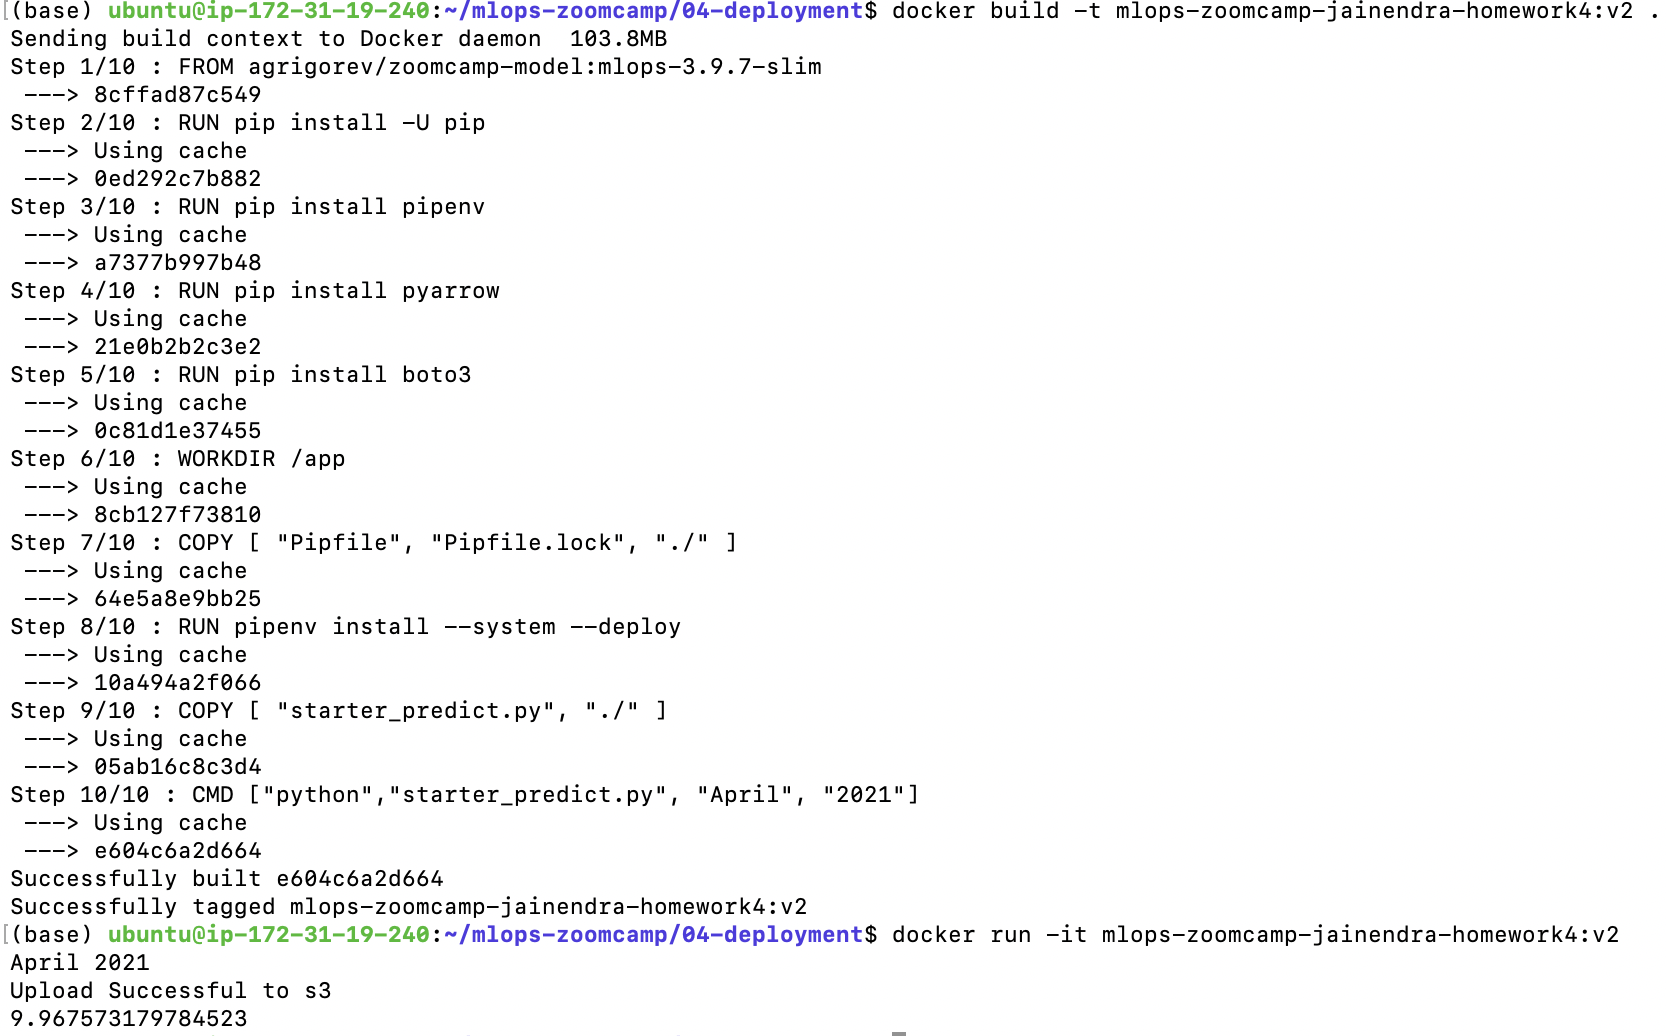